###기본 설치

In [1]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [2]:
# colab drive 연동
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
#패키지 불러오기
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [4]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 데이터 로드해서 회귀분석 

In [5]:
# 활동지 완속 현재 + / 잠재수요 회귀 

In [6]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [45]:
#활동지 현재수요
dfb_2=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동 빅콘count모음/활동지count_cust빅콘2번.csv',index_col=0)
dfb_3=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동 빅콘count모음/활동지count_cust빅콘3번(용인시내만).csv',index_col=0)
dfb_23=pd.merge(dfb_2,dfb_3,on='행정동')
dfb_23['현재수요지수']=dfb_23['cust_each_cell_x']+dfb_23['cust_each_cell_y']
dfb_23 = dfb_23.drop(['cust_each_cell_x'],axis=1,inplace=False)
dfb_23 = dfb_23.drop(['cust_each_cell_y'],axis=1,inplace=False)
#활동지 잠재수요
df_res = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/활동지수요산출용 (1).csv')
df2=pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/거주지수요지수산출용 (1) -2.csv')
df_res['행정동']=df_res['행정읍면동']
df_res.drop(['행정읍면동'],axis=1,inplace=True)
df3 = pd.merge(df_res,df2,on='행정동')
# 행정동명을 제거한 테이블 만들고 
dfd=df3[['행정동']]
df3 = df3.drop(['행정동'],axis=1,inplace=False)
#회귀용 테이블 생성
df3 = df3.drop(['공시지가'],axis=1,inplace=False)
df3 = df3.drop(['면적당 아파트 가격'],axis=1,inplace=False)
df3 = df3.drop(['보육시설 대비 아동 수'],axis=1,inplace=False)
df3 = df3.drop(['학원 수'],axis=1,inplace=False)
df3 = df3.drop(['유소년'],axis=1,inplace=False)
df3 = df3.drop(['연봉'],axis=1,inplace=False)
df3 = df3.drop(['전기차증가량'],axis=1,inplace=False)
df3 = df3.drop(['차량수'],axis=1,inplace=False)
df3 = df3.drop(['거주인구수'],axis=1,inplace=False)
df3 = df3.drop(['1인가구 수'],axis=1,inplace=False)
df3 = df3.drop(['공동주택비율'],axis=1,inplace=False)
df3 = df3.drop(['노후주택비율'],axis=1,inplace=False)
df3 = df3.drop(['단독주택비율'],axis=1,inplace=False)
df_res = df3.drop(['주거면적(제곱미터)'],axis=1,inplace=False)

df_res['문화쇼핑시설 수'] = df_res['쇼핑시설 수']+df_res['문화시설 수']
df_res['체육편의시설 수'] = df_res['체육시설 수']+df_res['편의시설 수']
df_res = df_res.drop(['쇼핑시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['문화시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['외식시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['잡화점 수'],axis=1,inplace=False)
df_res = df_res.drop(['체육시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['편의시설 수'],axis=1,inplace=False)
df_res = df_res.drop(['녹지비율'],axis=1,inplace=False)

df_res

,2020총OD,2019총OD,변화량,유동인구,기업체 수,상권유무,대규모 점포 수,녹지비율,편의시설 수,쇼핑시설 수,외식시설 수,잡화점 수,문화시설 수,체육시설 수,문화쇼핑시설 수,체육편의시설 수
0,191612.88700,181629.00000,9983.887000,5453,2572,1,1,57.11,18,49,466,36,4,45,53,63
1,109887.81500,111676.00000,-1788.185000,6302,1248,0,1,64.54,9,25,172,26,4,19,29,28
2,139254.81300,127630.00000,11624.813000,7532,1248,0,5,53.55,4,23,187,23,0,11,23,15
3,90204.45300,79461.00000,10743.453000,7075,1375,0,0,0.00,8,27,177,39,1,10,28,18
4,80202.44791,78877.50896,1324.938947,4847,722,0,2,60.12,2,14,155,29,0,7,14,9
5,94134.87232,92579.77068,1555.101645,5689,2112,1,0,65.52,12,20,310,29,5,40,25,52
6,56557.03877,55622.72037,934.318408,3418,416,0,0,47.45,1,10,77,5,1,8,11,9
7,70292.07500,68420.00000,1872.075000,3222,1122,0,0,75.59,4,22,177,35,1,18,23,22
8,126770.75600,116368.00000,10402.756000,6733,1983,0,0,77.57,13,36,355,46,10,34,46,47
9,116910.53700,118965.00000,-2054.463000,6502,944,0,0,62.29,10,31,162,27,2,16,33,26


In [9]:
# data scaling

# min-max scale
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(df_res)
columns = df_res.columns
df_scaled = pd.DataFrame(scaled,columns=columns)
df_scaled.corr()

,2020총OD,2019총OD,변화량,유동인구,기업체 수,상권유무,대규모 점포 수,문화쇼핑시설 수,체육편의시설 수
2020총OD,1.000000,0.994762,0.328449,0.443716,0.536981,0.326560,0.229859,0.577141,0.692613
2019총OD,0.994762,1.000000,0.230182,0.429758,0.542164,0.344252,0.216723,0.579585,0.700582
변화량,0.328449,0.230182,1.000000,0.253236,0.102495,-0.072020,0.185756,0.139049,0.120335
유동인구,0.443716,0.429758,0.253236,1.000000,0.502935,0.248084,0.241448,0.589223,0.336844
기업체 수,0.536981,0.542164,0.102495,0.502935,1.000000,0.432176,0.081839,0.806767,0.841902
상권유무,0.326560,0.344252,-0.072020,0.248084,0.432176,1.000000,0.244199,0.167182,0.412169
대규모 점포 수,0.229859,0.216723,0.185756,0.241448,0.081839,0.244199,1.000000,-0.013763,-0.058938
문화쇼핑시설 수,0.577141,0.579585,0.139049,0.589223,0.806767,0.167182,-0.013763,1.000000,0.753325
체육편의시설 수,0.692613,0.700582,0.120335,0.336844,0.841902,0.412169,-0.058938,0.753325,1.000000


In [56]:
y_target = df_scaled['변화량']
X_data = df_scaled.drop(['변화량'], axis=1, inplace=False)

def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

# 모델별로 5번 cross_val해서 평균 낸 RMSE
models = [lr_reg,dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)
    print(model)

##결과 GradientBoostingRegressor가 제일 낮은 RMSE를 보임

#####  LinearRegression  #####
 5 교차 검증의 평균 RMSE : 0.000 
LinearRegression()
#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.262 
DecisionTreeRegressor(max_depth=4, random_state=0)
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.241 
RandomForestRegressor(random_state=0)
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.234 
GradientBoostingRegressor(random_state=0)
[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depre

#### model 별 feature importance 시각화

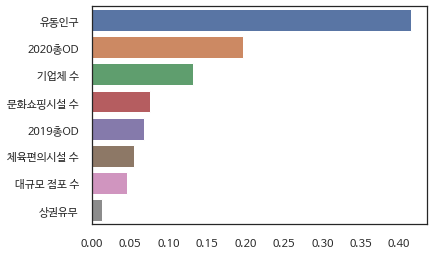

In [14]:
# import seaborn as sns
# %matplotlib inline

# # Random Forest Regressor 

# # 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
# rf_reg.fit(X_data, y_target)
# plt.rc("font", family = "NanumBarunGothic")
# sns.set(font="NanumBarunGothic", 
# rc={"axes.unicode_minus":False}, style='white')
# feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
# feature_series = feature_series.sort_values(ascending=False)
# sns.barplot(x= feature_series, y=feature_series.index)

In [16]:
# #Permutation importance of RF

# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf_reg,random_state=0).fit(X_data,y_target)
# eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
0.8188 ± 0.4973,유동인구
0.2077 ± 0.0628,2020총OD
0.1442 ± 0.0809,기업체 수
0.0940 ± 0.0309,문화쇼핑시설 수
0.0681 ± 0.0341,2019총OD
0.0425 ± 0.0187,체육편의시설 수
0.0118 ± 0.0053,대규모 점포 수
0.0088 ± 0.0055,상권유무


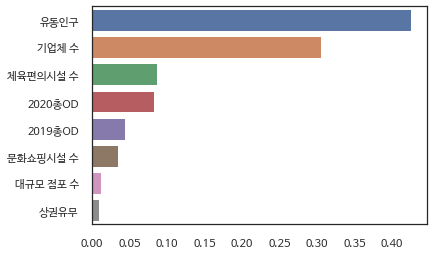

In [58]:
# GB regressor 

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
gb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=gb_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [59]:
#Permutation importance of GB
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gb_reg,random_state=0).fit(X_data,y_target)
eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
1.0310 ± 0.5502,유동인구
0.4104 ± 0.2640,기업체 수
0.1437 ± 0.0637,체육편의시설 수
0.1029 ± 0.0173,2020총OD
0.0719 ± 0.0054,2019총OD
0.0205 ± 0.0106,문화쇼핑시설 수
0.0045 ± 0.0030,대규모 점포 수
0.0028 ± 0.0020,상권유무


[14:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


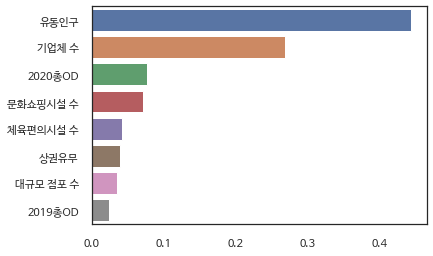

In [19]:
# # XGB regressor 

# # 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
# xgb_reg.fit(X_data, y_target)

# feature_series = pd.Series(data=xgb_reg.feature_importances_, index=X_data.columns )
# feature_series = feature_series.sort_values(ascending=False)
# sns.barplot(x= feature_series, y=feature_series.index)

In [20]:
# #Permutation importance of XGB
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(xgb_reg,random_state=0).fit(X_data,y_target)
# eli5.show_weights(perm, feature_names = X_data.columns.tolist())

Weight,Feature
0.9485 ± 0.5642,유동인구
0.2936 ± 0.1595,기업체 수
0.2856 ± 0.1400,2020총OD
0.0923 ± 0.0427,체육편의시설 수
0.0716 ± 0.0106,2019총OD
0.0410 ± 0.0159,문화쇼핑시설 수
0.0052 ± 0.0042,상권유무
0.0009 ± 0.0007,대규모 점포 수


In [62]:
import statsmodels.api as sm
# 상수항 b0 추가 
X_data1 = sm.add_constant(X_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y_target, X_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()
y_target = df_scaled['변화량']
X_data = df_scaled.drop(['2019총OD','상권유무','대규모 점포 수','문화쇼핑시설 수','2019총OD','체육편의시설 수'], axis=1, inplace=False)
# 상수항 b0 추가 
X_data1 = sm.add_constant(X_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y_target, X_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    변화량   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.864e+30
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:30:09   Log-Likelihood:                 1196.9
No. Observations:                  35   AIC:                            -2384.
Df Residuals:                      30   BIC:                            -2376.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.018e-16   1.56e-16     -1.930      0.063   -6.21e-16    1.75e-17
2020총OD     1.388e-16   2.98e-16      0.465      0.645   -4.71e-16    7.48e-16
변화량            1.0000   2.75e-16   3.64e+15      0.000       1.000       1.000
유동인구       -1.145e-16   3.19e-16     -0.359      0.722   -7.65e-16    5.36e-16
기업체 수       7.286e-17   3.03e-16      0.240      0.812   -5.46e-16    6.92e-16
==============================================================================
Omnibus:                        3.857   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.592
Skew:                           0.627   Prob(JB):                        0.274
Kurtosis:                       3.455   Cond. No.                         8.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# feature importance 기반으로 점수식 만들기

# 유동인구 / 기업체 수 두가지 고려

# 1.0310 / 1.0310	유동인구
# 0.4104 / 1.0310	기업체
# 0.1437 / 1.0310	체육편의시설
# 0.1029 / 1.0310	 2020 총 0d 

유동인구w = 1.0310 / 1.0310
기업체w = 0.4104 / 1.0310
체육편의시설w = 0.1437 / 1.0310
odw = 0.1029 / 1.0310

In [63]:
# 데이터프레임에서 두가지 변수만 추출
df_수요지수 = df_scaled[['유동인구','기업체 수']]

잠재수요지수 = []
for i in range(len(df_수요지수)):
  잠재수요지수.append( ( df_수요지수.values[i][0] * 유동인구w ) + ( df_수요지수.values[i][1] * 기업체w ) )
df_수요지수['잠재수요지수'] = 잠재수요지수
df_수요지수['행정동'] = dfd['행정동']
df_수요지수

,유동인구,기업체 수,잠재수요지수,행정동
0,0.427429,0.930514,0.797829,구갈동
1,0.530288,0.359085,0.673226,구성동
2,0.679307,0.359085,0.822244,기흥동
3,0.623940,0.413897,0.788696,남사읍
4,0.354010,0.132067,0.406581,동백1동
5,0.456021,0.731981,0.747394,동백2동
6,0.180882,0.000000,0.180882,동백3동
7,0.157136,0.304704,0.278427,동부동
8,0.582505,0.676306,0.851716,동천동
9,0.554519,0.227881,0.645229,마북동


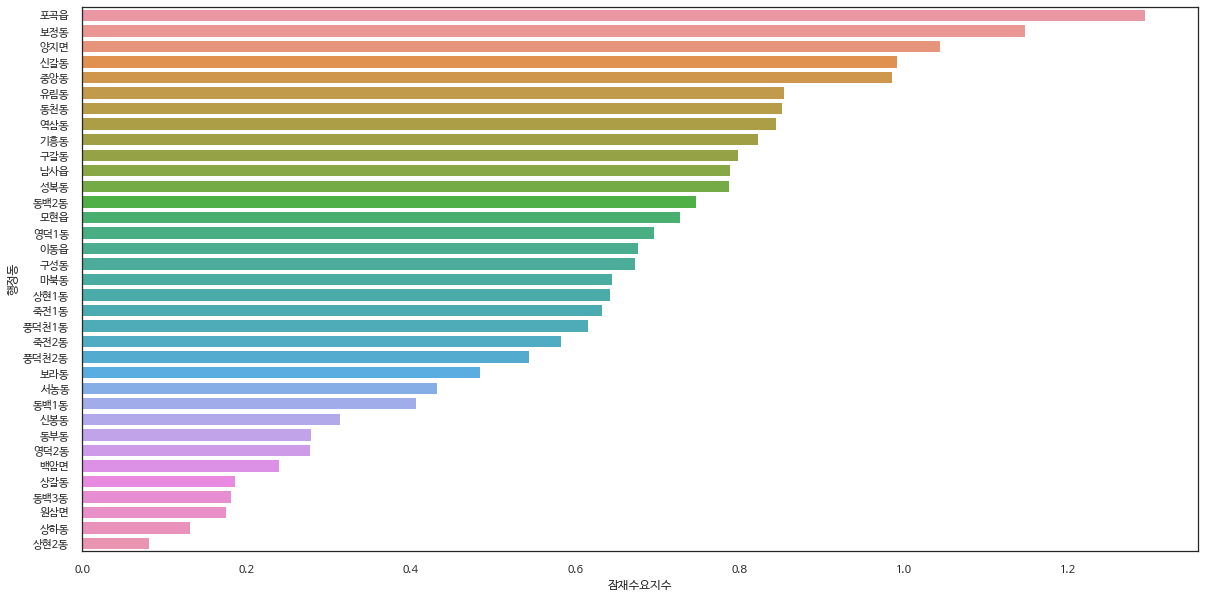

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
순위대로정렬 = df_수요지수.sort_values('잠재수요지수', ascending=False)

sns.barplot(x=순위대로정렬['잠재수요지수'], y=순위대로정렬['행정동'])

In [65]:
# min-max scale
curr_count=dfb_23[['현재수요지수']]
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(curr_count)
columns = curr_count.columns
curr_count = pd.DataFrame(scaled,columns=columns)
#현재수요지수 합치기
curr_count['행정동']=dfb_23['행정동']
df_cf=pd.merge(df_수요지수,curr_count,on='행정동')
df_cf

,유동인구,기업체 수,잠재수요지수,행정동,현재수요지수
0,0.427429,0.930514,0.797829,구갈동,0.556319
1,0.530288,0.359085,0.673226,구성동,0.429095
2,0.679307,0.359085,0.822244,기흥동,0.439509
3,0.623940,0.413897,0.788696,남사읍,0.354266
4,0.354010,0.132067,0.406581,동백1동,0.245899
5,0.456021,0.731981,0.747394,동백2동,0.309476
6,0.180882,0.000000,0.180882,동백3동,0.188933
7,0.157136,0.304704,0.278427,동부동,0.000000
8,0.582505,0.676306,0.851716,동천동,0.557591
9,0.554519,0.227881,0.645229,마북동,0.529850


In [66]:
#순위매기기
df_cf['현재수요순위'] = df_cf.현재수요지수.rank(method='max',ascending=False)
df_cf['잠재수요순위'] = df_cf.잠재수요지수.rank(method='max',ascending=False)
df_cf['최종순위']=df_cf['잠재수요순위']+df_cf['현재수요순위']
df_cf['현재수요순위']=df_cf['현재수요순위'].astype(int)
df_cf['잠재수요순위']=df_cf['잠재수요순위'].astype(int)
df_cf['최종순위']=df_cf['최종순위'].astype(int)
df_cf=df_cf.sort_values(by='최종순위',ascending=True)

In [67]:
df_cf

,유동인구,기업체 수,잠재수요지수,행정동,현재수요지수,현재수요순위,잠재수요순위,최종순위
32,1.000000,0.737592,1.293606,포곡읍,0.655246,6,1,7
23,0.569906,0.689685,0.844442,역삼동,0.692828,5,8,13
8,0.582505,0.676306,0.851716,동천동,0.557591,7,7,14
20,0.787739,0.513164,0.992009,신갈동,0.521619,11,4,15
13,0.855706,0.733276,1.147594,보정동,0.491639,13,2,15
19,0.640659,0.367285,0.786861,성복동,0.721281,4,12,16
27,0.730191,0.312905,0.854746,유림동,0.529723,10,6,16
10,0.348074,0.953388,0.727579,모현읍,0.967073,2,14,16
0,0.427429,0.930514,0.797829,구갈동,0.556319,8,10,18
22,0.827235,0.544670,1.044047,양지면,0.422114,20,3,23


In [55]:
df_cf.to_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/활동지_읍면동별수요지수.csv')